#### Imports

In [58]:
import pandas as pd # Pour la manipulation des données
import numpy as np # Pour les calculs numériques
from sklearn import tree # Pour les arbres de décision
from sklearn.tree import DecisionTreeClassifier # Pour les arbres de décision
import matplotlib.pyplot as plt # Pour les graphiques
from sklearn.model_selection import train_test_split # Pour séparer les données en ensembles d'entraînement et de test
from sklearn.linear_model import LinearRegression # Pour la régression linéaire
from sklearn.preprocessing import StandardScaler # Pour la normalisation des données
from sklearn.decomposition import PCA # Pour l'analyse en composantes principales
from sklearn.neural_network import MLPRegressor # Pour les réseaux de neurones
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Pour évaluer les modèles

# On load le dataset
data = pd.read_csv("listings.csv2.gz")

#### Collecte de données
afficher nombre de colonnes et de lignes


In [ ]:
print(f"Nombre de colonnes : {data.columns.__len__()}")
print(f"Nombre de lignes : {data.index.__len__()}")

## Pré-traitement des données

#### Sélection des colonnes les plus pertinentes à évaluer

#### Supprimer les doublons

#### Conversion des types de colonnes
- Conversion de Texte en Chiffres
- Extraction de Nombres
- Uniformisation des Données

## Analyse descriptive des données

#### Relation entre la note globale et les prix des locations à Paris

#### Prix moyen par type de propriété à Paris

#### Prix en fonction de Location disponible à Paris

#### Répartition des locations disponible et non disponible pour Paris

## Entraînement et test du modèle

#### Régression linéaire ALGO 1

#### Régression linéaire ALGO 2

## Prédiction du prix (Regression lineair)

#### Regression lineair ALGO

#### Comparer les valeurs prédites par le modèle aux valeurs réelles

## Prédiction du prix (Decision tree)

#### Decision tree ALGO 1

#### Decision tree ALGO 2

Réseaux de neurones

In [75]:
#traitement ;)

data.head()

data.info()
data.isna().sum()

data["price"] = (
    data["price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

# eviter des prix pas cool
data = data[data["price"] > 10] 
data = data[data["price"] < 1000]

# je supprime si peut d'impacte
data = data.dropna(subset=[
    "latitude", "longitude",
    "accommodates", "bedrooms", "beds",
    "minimum_nights", "number_of_reviews",
    "reviews_per_month", "review_scores_rating",
    "availability_365", "calculated_host_listings_count"])

<class 'pandas.core.frame.DataFrame'>
Index: 53439 entries, 0 to 84054
Data columns (total 80 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            53439 non-null  int64  
 1   listing_url                                   53439 non-null  object 
 2   scrape_id                                     53439 non-null  int64  
 3   last_scraped                                  53439 non-null  object 
 4   source                                        53439 non-null  object 
 5   name                                          53439 non-null  object 
 6   description                                   51783 non-null  object 
 7   neighborhood_overview                         26078 non-null  object 
 8   picture_url                                   53438 non-null  object 
 9   host_id                                       53439 non-null  int6

MAE : 67.95693425733408
RMSE : 101.44903849355404
R² : 0.5208210940184728


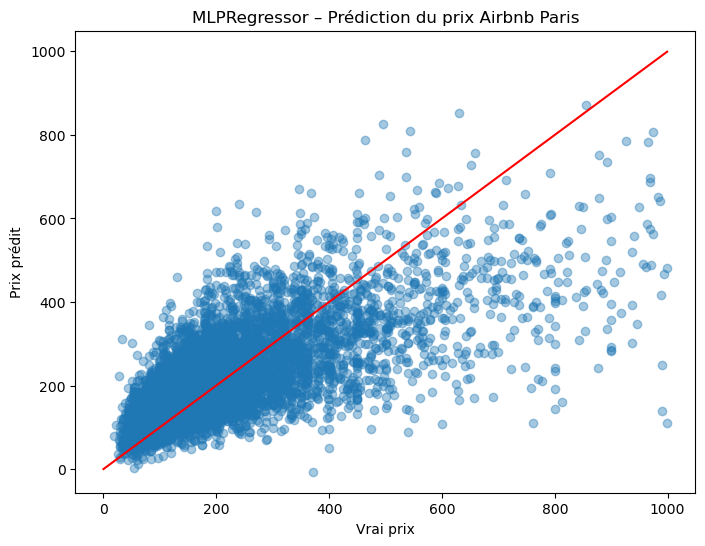

In [92]:
cols_X = [
    "accommodates", "bedrooms", "beds",
    "minimum_nights", "number_of_reviews",
    "reviews_per_month", "review_scores_rating",
    "availability_365", "calculated_host_listings_count"
]

data_model = data[cols_X + ["price"]].dropna()
X = data_model[cols_X]
y = data_model["price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE :", rmse)
print("R² :", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Vrai prix")
plt.ylabel("Prix prédit")
plt.title("MLPRegressor – Prédiction du prix Airbnb Paris")
plt.plot([0, max(y_test)], [0, max(y_test)], color="red")
plt.show()


# XGboost

# Qu’est-ce que XGBoost ? 

XGBoost signifie Extreme Gradient Boosting. C’est un algorithme de boosting d’arbres de décision, qui construit une série d’arbres faibles pour corriger les erreurs des arbres précédents.

Chaque nouvel arbre essaie de minimiser la perte résiduelle des arbres précédents, ce qui améliore progressivement la précision. C’est un modèle très utilisé en machine learning compétitif car il est :

Rapide à entraîner, même sur de gros datasets,
Très précis,
Capable de gérer à la fois des variables numériques et catégorielles.

# Pourquoi utiliser XGBoost pour prédire le prix ?

Les prix des locations dépendent de plusieurs facteurs numériques et catégoriels (emplacement, nombre de nuits minimum, type de logement, etc.).

XGBoost peut capturer des relations non-linéaires complexes entre ces variables et le prix.

Par rapport à une régression linéaire, XGBoost peut modéliser des effets d’interactions entre les variables.

Par rapport à un Random Forest classique, XGBoost est souvent plus précis grâce au boosting et à la régularisation intégrée.

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


XGBoost - Test R²=0.5259, RMSE=153.98
XGBoost - Full  R²=0.6469, RMSE=132.82
Best params: {'subsample': 1.0, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


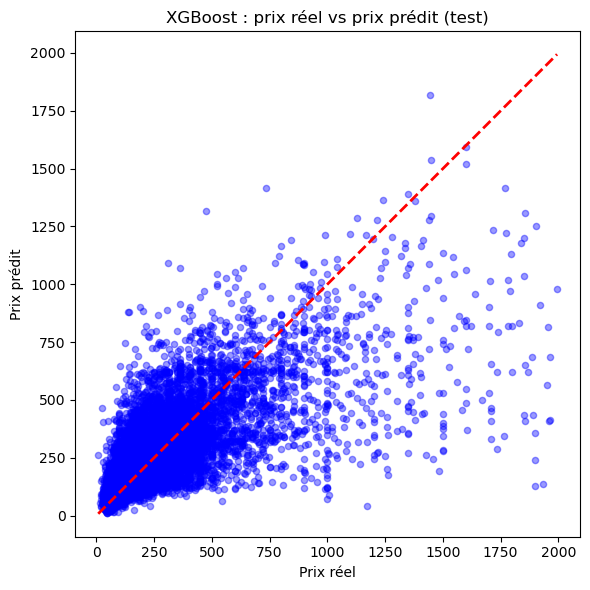

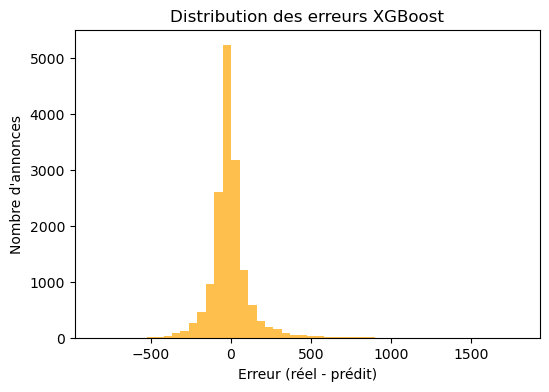

In [86]:
# 1) Chargement et nettoyage
df = pd.read_csv("listings.csv2.gz")
df['price_clean'] = df['price'].replace('[\$,€]', '', regex=True).astype(float)
df = df[(df['price_clean'] > 5) & (df['price_clean'] < 2000)]

# 2) Features numériques uniquement 
keep_cols = [
    "accommodates", "bedrooms", "beds",
    "minimum_nights", "number_of_reviews",
    "reviews_per_month", "review_scores_rating",
    "availability_365", "calculated_host_listings_count"
]
X = df[keep_cols].copy()
y = df['price_clean']

# 3) Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

# 4) Imputation + scaling
imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled = scaler.transform(X_test_imp)

# 5) XGBoost avec RandomizedSearchCV
xgb = XGBRegressor(objective="reg:squarederror", random_state=42, n_jobs=-1, verbosity=0)

param_dist = {
    "n_estimators": [200, 300, 400],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

rs_xgb = RandomizedSearchCV(
    xgb, param_distributions=param_dist,
    n_iter=15, scoring="neg_mean_squared_error", cv=3,
    random_state=RANDOM_STATE, n_jobs=-1, verbose=0
)

rs_xgb.fit(X_train_scaled, y_train)
best_xgb = rs_xgb.best_estimator_

# 6) Prédictions
y_pred_test = best_xgb.predict(X_test_scaled)
y_pred_all = best_xgb.predict(scaler.transform(imputer.transform(X)))

# 7) Metrics
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
rmse_all  = np.sqrt(mean_squared_error(y, y_pred_all))
r2_all = r2_score(y, y_pred_all)

print(f"XGBoost - Test R²={r2_test:.4f}, RMSE={rmse_test:.2f}")
print(f"XGBoost - Full  R²={r2_all:.4f}, RMSE={rmse_all:.2f}")
print("Best params:", rs_xgb.best_params_)

# 8) Feature importances
xgb_importances = pd.DataFrame({
    "variable": X.columns,
    "importance_xgb": best_xgb.feature_importances_
}).sort_values(by="importance_xgb", ascending=False)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.4, s=20, color="blue")
mn = min(y_test.min(), y_pred_test.min())
mx = max(y_test.max(), y_pred_test.max())
plt.plot([mn, mx], [mn, mx], "r--", linewidth=2)
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("XGBoost : prix réel vs prix prédit (test)")
plt.tight_layout()
plt.show()

residuals = y_test - y_pred_test
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=50, color="orange", alpha=0.7)
plt.xlabel("Erreur (réel - prédit)")
plt.ylabel("Nombre d'annonces")
plt.title("Distribution des erreurs XGBoost")
plt.show()